# 시계열 분해 : 추세 , 계절성, 주기, 불규칙성 요소 분리하여 시각화 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

### 시계열 데이터 생성 

In [2]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})

print(data)

         Date     Value
0  2023-01-01  1.899256
1  2023-01-02  0.396462
2  2023-01-03 -0.249576
3  2023-01-04 -0.231761
4  2023-01-05 -0.515491
..        ...       ...
95 2023-04-06  0.183065
96 2023-04-07  0.569311
97 2023-04-08  0.767475
98 2023-04-09 -1.281954
99 2023-04-10  1.267865

[100 rows x 2 columns]


### 시계열 분해 

0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
        ...    
95   2023-04-06
96   2023-04-07
97   2023-04-08
98   2023-04-09
99   2023-04-10
Name: Date, Length: 100, dtype: datetime64[ns] 0          NaN
1          NaN
2          NaN
3     0.104087
4     0.113176
        ...   
95    0.024047
96    0.233438
97         NaN
98         NaN
99         NaN
Name: trend, Length: 100, dtype: float64


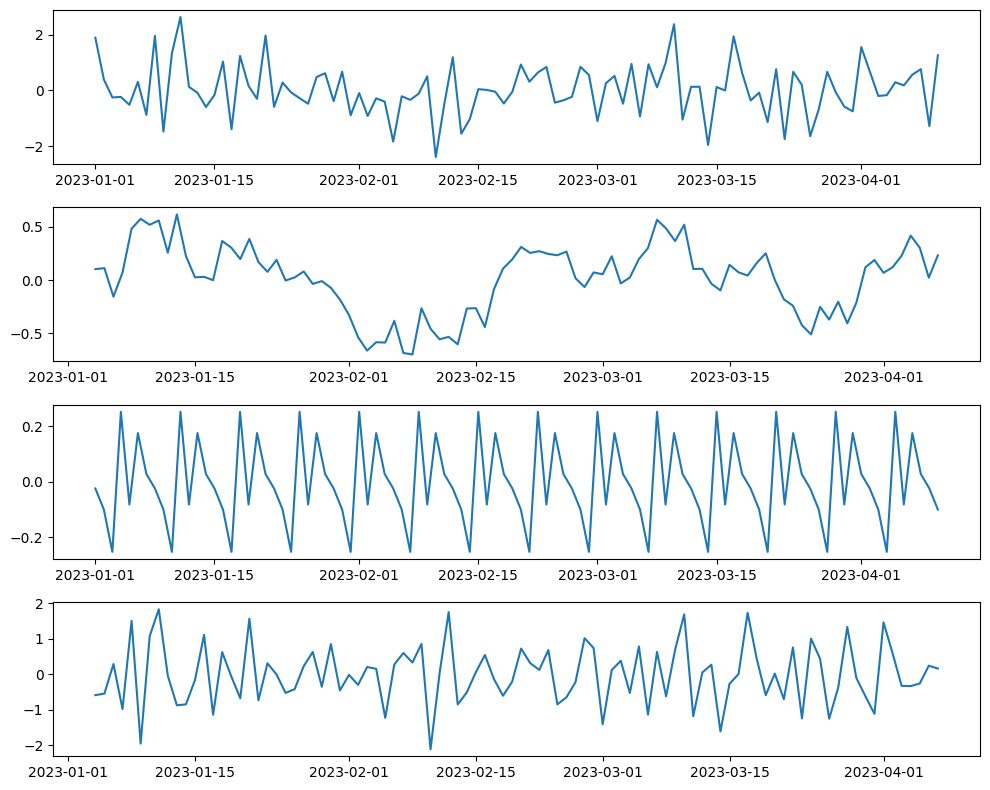

In [6]:
# 시계열 분해 
result = seasonal_decompose(data['Value'], model='additive', period=7)

# 분해 결과 시각화 
plt.figure(figsize=(10,8))

# 원본 데이터 
plt.subplot(4,1,1)
plt.plot(data['Date'], data['Value'])

# 추세 데이터 
plt.subplot(4,1,2)
plt.plot(data['Date'], result.trend)

# 계절성 데이터 
plt.subplot(4,1,3)
plt.plot(data['Date'], result.seasonal)

# 불규칙성 데이터 
plt.subplot(4,1,4)
plt.plot(data['Date'], result.resid)

plt.tight_layout()
plt.show()